In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
data = pd.read_csv("NetflixOriginals.csv", encoding='latin-1')

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [28]:
data.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [29]:
data.sample(5)

,Title,Genre,Premiere,Runtime,IMDB Score,Language
334,Life Overtakes Me,Documentary,"June 14, 2019",40,6.5,English/Swedish
32,Paris Is Us,Romance drama,"February 22, 2019",83,4.6,French
197,"Frankenstein's Monster's Monster, Frankenstein",Mockumentary,"July 16, 2019",32,5.9,English
299,Irreplaceable You,Drama,"February 16, 2018",96,6.4,English
159,Velvet Buzzsaw,Thriller,"February 1, 2019",112,5.7,English


In [30]:
data.isna().sum()

,0
Title,0
Genre,0
Premiere,0
Runtime,0
IMDB Score,0
Language,0


In [31]:
data.describe()

,Runtime,IMDB Score
count,584.000000,584.000000
mean,93.577055,6.271747
std,27.761683,0.979256
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.350000
75%,108.000000,7.000000
max,209.000000,9.000000


In [32]:
data.duplicated().sum()

0

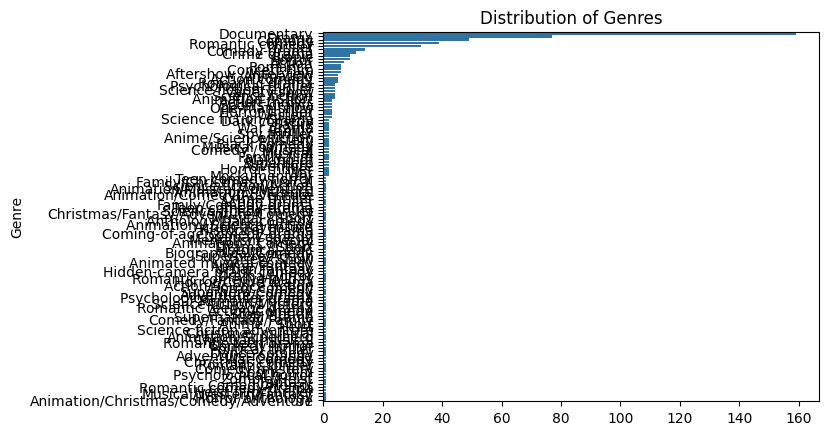

In [44]:
# Genre Distribution
genre_counts = data['Genre'].value_counts()
sns.barplot(y=genre_counts.index, x=genre_counts.values)
plt.title('Distribution of Genres')
plt.show()

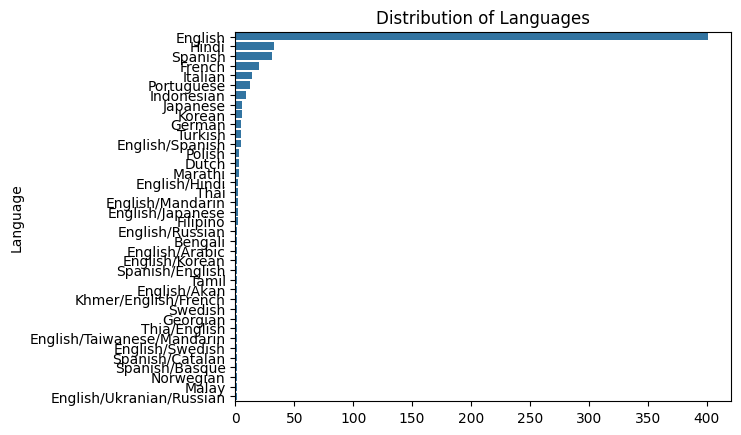

In [45]:
language_counts = data['Language'].value_counts()
sns.barplot(y=language_counts.index, x=language_counts.values)
plt.title('Distribution of Languages')
plt.show()

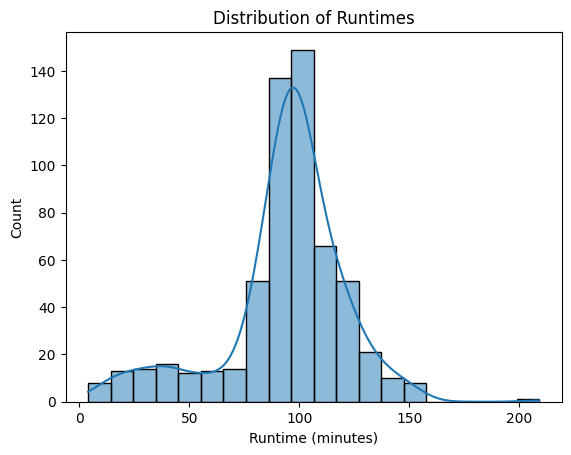

In [46]:
sns.histplot(data['Runtime'], bins=20, kde=True)
plt.title('Distribution of Runtimes')
plt.xlabel('Runtime (minutes)')
plt.show()

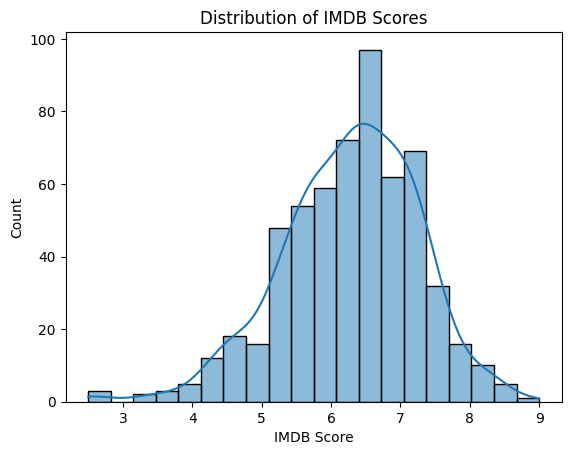

In [47]:
# IMDB Score Distribution
sns.histplot(data['IMDB Score'], bins=20, kde=True)
plt.title('Distribution of IMDB Scores')
plt.xlabel('IMDB Score')
plt.show()

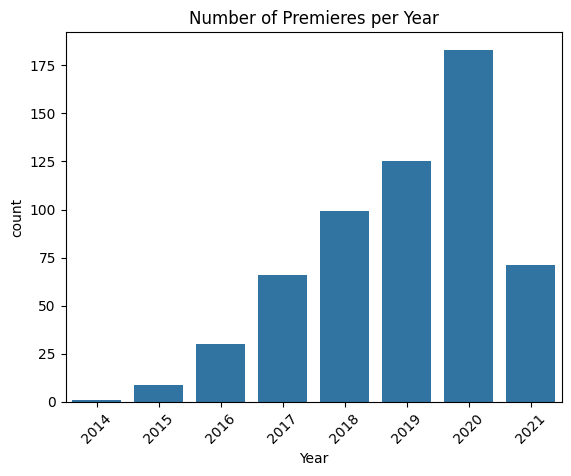

In [51]:
data['Premiere'] = pd.to_datetime(data['Premiere'], format='mixed', errors='coerce')

# Yearly distribution of Premieres
data['Year'] = data['Premiere'].dt.year
sns.countplot(x='Year', data=data)
plt.title('Number of Premieres per Year')
plt.xticks(rotation=45)
plt.show()

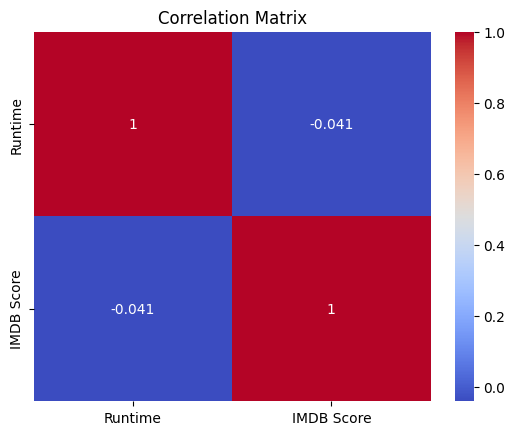

In [52]:
correlation = data[['Runtime', 'IMDB Score']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

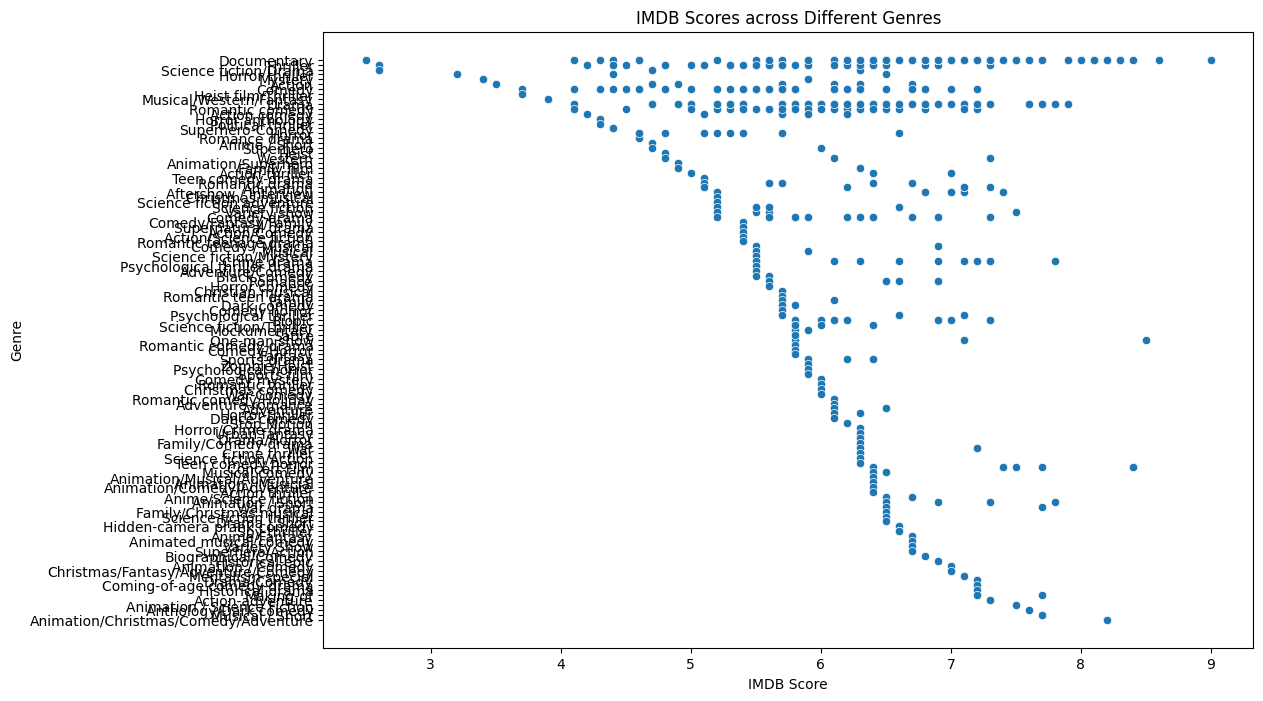

In [57]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='IMDB Score', y='Genre', data=data)
plt.title('IMDB Scores across Different Genres')
plt.show()

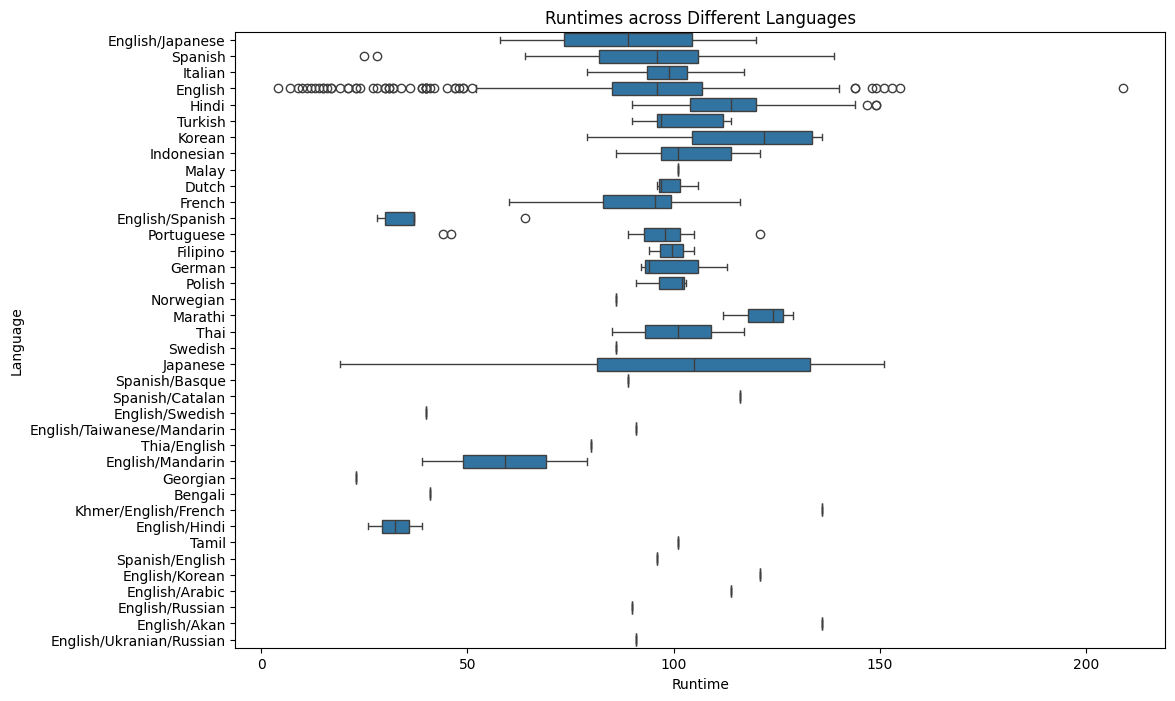

In [58]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Runtime', y='Language', data=data)
plt.title('Runtimes across Different Languages')
plt.show()